# Funciones importantes

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Señales típicas

Algunas [señales](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) juegan un rol muy importante en la teoría y aplicaciones prácticas.

### Función uno

Definiremos la función uno de la siguiente manera

$$ 1(t) = 1, \hspace{.5cm} \forall t $$

<a name="sinusoides"></a>
### Sinusoides

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(freq,amp,phase):
    x = np.linspace(0, 2*np.pi,1000)
    y = amp*np.sin(2*np.pi* x * freq + phase) 
    t = "%.1f sin(2$\pi$ %.1f x + %.1f)" %(amp,freq,phase)
    plt.title(t)
    plt.plot(x, y)
    plt.xlim(0, 4)
    plt.ylim(-1, 1)    
    plt.xlabel('x')
    plt.xticks([0,4],['$0$','$4$'])
    plt.yticks([-1,0,1],['$-1$','$0$','$1$'])
    
slider_freq = widgets.FloatSlider(value=1,min=0,max=5.,step=0.5)   
slider_amp = widgets.FloatSlider(value=0.5,min=0,max=1.0,step=0.1) 
slider_phase = widgets.FloatSlider(value=0,min=0,max=2*np.pi,step=0.5) 

interact(plot_func, freq=slider_freq, amp=slider_amp, phase=slider_phase)

interactive(children=(FloatSlider(value=1.0, description='freq', max=5.0, step=0.5), FloatSlider(value=0.5, de…

<function __main__.plot_func(freq, amp, phase)>

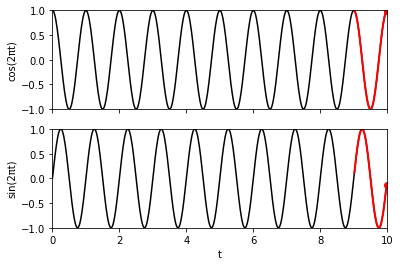

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

t = np.linspace(0, 10, 500)
x = np.cos(2 * np.pi * t)
y = np.sin(2 * np.pi * t)


ax1.set_ylabel(u'cos(2\u03c0t)')
ax1.set_xlim(0, 10)
ax1.set_ylim(-1, 1)
plt.setp(ax1.get_xticklabels(),visible=False)

ax2.set_xlabel('t')
ax2.set_ylabel(u'sin(2\u03c0t)')
ax2.set_xlim(0, 10)
ax2.set_ylim(-1, 1)

lines = []
for i in range(len(t)):
    head = i - 1
    head_slice = (t > t[i] - 1.0) & (t < t[i])
    line1,  = ax1.plot(t[:i], x[:i], color='black')
    line1a, = ax1.plot(t[head_slice], x[head_slice], color='red', linewidth=2)
    line1e, = ax1.plot(t[head], x[head], color='red', marker='o', markeredgecolor='r')
    line2,  = ax2.plot(t[:i], y[:i], color='black')
    line2a, = ax2.plot(t[head_slice], y[head_slice], color='red', linewidth=2)
    line2e, = ax2.plot(t[head], y[head], color='red', marker='o', markeredgecolor='r')
    lines.append([line1,line1a,line1e,line2,line2a,line2e])


# Build the animation using ArtistAnimation function

ani = animation.ArtistAnimation(fig,lines,interval=50,blit=True)

HTML(ani.to_html5_video())

<a name="exponencial_compleja"></a>
### Exponencial compleja

La [exponencial compleja](./A1-Fundamentos_matematicos.ipynb#exponencial_compleja) está dada por la ecuación

$$
f(t) = e^{s t} 
$$

donde $s = \sigma + i \omega$ denota una frecuencia compleja $\sigma, \omega \in \mathbb{R}$. Esta señal se utiliza como una representación generalizada de señales armónicas. Mediante la [fórmula de Euler](https://en.wikipedia.org/wiki/Euler's_formula) la ecuación anterior se puede escribir como:

$$
f(t) = e^{(\sigma + i \omega) t} = e^{\sigma t} \cos(\omega t) + i e^{\sigma t} \sin(\omega t)
$$

Esta señal se utiliza para modelar señales armónicas con amplitud constante o exponencialmente decayente o creciente.

Las exponenciales complejas de las forma $e^{st}$ son las bases de la Transformada de Laplace, y las de la forma $e^{i\omega t}$ son las bases de la Transformada de Fourier.

**Ejemplo:**

In [5]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

Gráficamente, para ciertos valores de $\sigma$ and $\omega$, podemos obtener

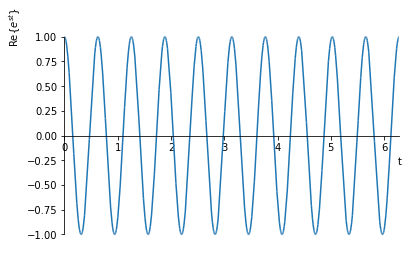

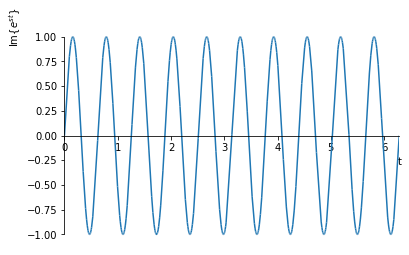

In [4]:
y = x.subs({omega: 10, sigma: -0})

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}')
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}');

**Ejemplo:**
    
Relación entre el movimiento circular (representado por una exponencial compleja), y las funciones seno y coseno.

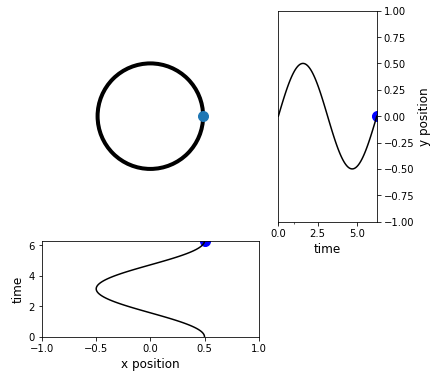

In [5]:
%matplotlib inline 

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

#from JSAnimation.IPython_display import display_animation
from matplotlib import animation

Nframes = 100
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6,6))

rad = 0.5
# ax = fig.add_subplot(111, xlim=(-2.*rad, 2.*rad), ylim=(-2.*rad, 2.*rad), aspect='equal')
ax = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2, 
                      xlim=(-2.*rad, 2.*rad), ylim=(-2.*rad, 2.*rad), aspect='equal')
circ = plt.Circle((0, 0), radius=rad, facecolor="None", edgecolor='k', lw=4)
ax.add_patch(circ)
ax.grid(False)
ax.axis('off')
circle, = ax.plot([], [], marker='o', ms=10)

#ax1 = fig.add_subplot(212, ylim=(0, 2.*np.pi), xlim=(-2.*rad, 2.*rad))
ax1 = plt.subplot2grid((3,3), (2,0), colspan=2, ylim=(0, 2.*np.pi), xlim=(-2.*rad, 2.*rad), sharex=ax)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_ylabel('time', fontsize=12)
ax1.set_xlabel('x position', fontsize=12)
x_pos_marker, = ax1.plot([], [], marker='o', ms=10, color='b')
x_pos_line, = ax1.plot([], [], color='k')

#ax2 = fig.add_subplot(122, xlim=(0, 2.*np.pi), ylim=(-2.*rad, 2.*rad))
ax2 = plt.subplot2grid((3,3), (0,2), rowspan=2, xlim=(0, 2.*np.pi), ylim=(-2.*rad, 2.*rad), sharey=ax)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_xlabel('time', fontsize=12)
ax2.set_ylabel('y position', fontsize=12)
ax2.set_xticks([0,1],['$0$','$4$'])
y_pos_marker, = ax2.plot([], [], marker='o', ms=10, color='b')
y_pos_line, = ax2.plot([], [], color='k')

# initialization function: plot the background of each frame
def init():
    circle.set_data([], [])
    x_pos_marker.set_data([], [])
    y_pos_marker.set_data([], [])
    x_pos_line.set_data([], [])
    y_pos_line.set_data([], [])
    return circle, x_pos_marker, y_pos_marker, x_pos_line, y_pos_line

# This function moves the polygons as a function of the frame i
def animate(i):
    t = 2.*np.pi*float(i/(Nframes - 1.))
    x_marker = rad*np.cos(t)
    y_marker = rad*np.sin(t)
    circle.set_data(x_marker, y_marker)
    x_pos_marker.set_data(x_marker, t)
    y_pos_marker.set_data(t, y_marker)
    
    all_t = np.linspace(0, 2.*np.pi, Nframes)
    x = rad*np.cos(all_t)
    y = rad*np.sin(all_t)
    x_pos_line.set_data(x, all_t)
    y_pos_line.set_data(all_t, y)

    return circle, x_pos_marker, y_pos_marker, x_pos_line, y_pos_line
  
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nframes, interval=100, blit=True)

# call our new function to display the animation
HTML(anim.to_html5_video())

Las exponenciales complejas, vistas en 3D, parecen resortes o hélices:

In [1]:
from sympy import symbols, cos, sin, I, pi
from sympy.plotting import plot3d_parametric_line

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sympy as sym

%matplotlib inline

t = symbols('t')

sym.init_printing()

def plot_func(u):    
    plot3d_parametric_line((cos(2*pi*u*t), t ,  sin(2*pi*u*t) , (t, -5, 5)))
                           
slider_u = widgets.FloatSlider(value=1,min=-5.,max=5.,step=0.25)  
interact(plot_func, u=slider_u)

display(plot_func)

interactive(children=(FloatSlider(value=1.0, description='u', max=5.0, min=-5.0, step=0.25), Output()), _dom_c…

<function __main__.plot_func(u)>

**Ejercicio**

* Probar con otros valores de $\omega$ y $\sigma$ para crear señales diferentes

<a name="ortogonalidad_exponenciales_complejas"></a>
### Ortogonalidad de las exponenciales complejas

Una propiedad muy importante de las exponenciales complejas, es que son ortogonales. Esto es, el producto interno de una exponencial compleja respecto a otra con distinto argumento, cumple con la propiedad:

\begin{equation}
(e^{i n x},e^{i m x}) = \int_{-\pi}^{\pi} e^{i n x} \overline{e^{i m x}} dx = \begin{cases} 2 \pi & \mbox{si} \hspace{0.2cm} n = m \\ 0 & \mbox{si} \hspace{0.2cm} n \neq m \end{cases}
\end{equation}

donde $\overline{e^{i \omega x}} = e^{-i \omega x}$, es el complejo conjugado de $e^{i \omega x}$.

<a name="escalon"></a>
*** 
### El escalón o señal de Heaviside

El escalón o [función de Heaviside](https://en.wikipedia.org/wiki/Heaviside_step_function) se define por:

$$
\vcenter{{\large \ulcorner}}(t) = \begin{cases} 0 & t<0 \\ 1 & t > 0 \end{cases}
$$

También podría ser definido como
$$
\vcenter{{\large \ulcorner}}(t) = \begin{cases} 0 & t<0 \\  \frac{1}{2} & t=0 \\ 1 & t > 0 \end{cases}
$$

Por lo general, no es importante determinar el valor exacto en la discontinuidad.


**Ejemplo**

Se suele notar también al escalón como $u(t)$, $H(t)$ o $\theta(t)$.

In [7]:
step = sym.Heaviside(t)
step

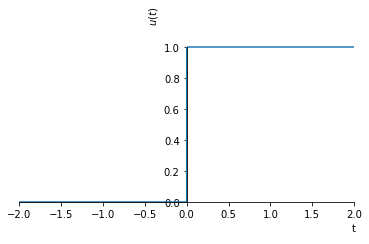

In [8]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$u(t)$');

Esta función es util como concepto de interruptor (switch). Una función armónica $\cos(\omega t)$ con $\omega=2$ que se enciende en $t=0$, es simplemente: 

$$
x(t) = \cos(\omega t) \cdot u(t)
$$

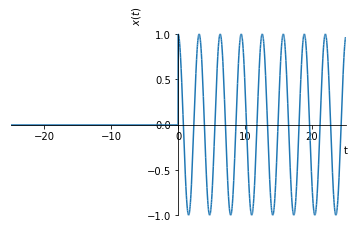

In [9]:
x = sym.cos(omega*t) * sym.Heaviside(t)
sym.plot(x.subs(omega,2), (t, -25, 25), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

<a name="rect"></a>
***
### Señal rectangular (rect)

Un rect o [función rectangular](https://en.wikipedia.org/wiki/Rectangular_function)

se define como:

$$
\sqcap(t) = \begin{cases} 1 & |t| < \frac{1}{2} \\ 0 & |t| > \frac{1}{2} \end{cases}
$$

Típicamente se escogen sus límites de tal manera que tenga área 1. 

Esta función se puede definir también en términos del escalón:

$$
\sqcap(t) = u \left(t + \frac{1}{2} \right) - u \left(t - \frac{1}{2} \right)
$$

**Ejemplo**

Utilizando la definición anterior, en términos de la función escalón, podemos definir la función rect de la siguiente forma:

In [10]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

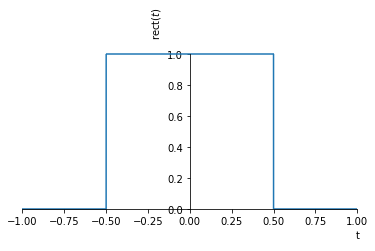

In [11]:
sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');

### Señal triangular ($\wedge$)

Un triangulo o [función triangular](https://en.wikipedia.org/wiki/Triangular_function)

se define como:

$$
    \wedge(t) = \begin{cases} 1 - |t| & |t| < 1 \\ 0 & |t| \geq 1 \end{cases}
$$

Típicamente se escogen sus límites de tal manera que tenga área 1. 

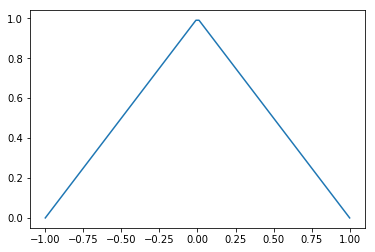

In [12]:
%matplotlib inline 

from IPython.display import Image
import matplotlib.pyplot as plt

def triangle(x): 
    return abs((x)%2-1)

t = np.linspace(-1,1, 100)

plt.plot(t, triangle(t), label='$\wedge(t)$')
plt.show()    



<a name="signo"></a>
***
### Signo

La señal [signo](https://en.wikipedia.org/wiki/Sign_function) evalúa el signo de su argumento:

$$
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ -1 & t < 0  \end{cases}
$$

Esta señal es útil para representar el valor absoluto de una señal real $x(t) \in \mathbb{R}$ mediante una multiplicación

$$
|x(t)| = x(t) \cdot \text{sgn}(x(t))
$$

Se relaciona con el escalón mediante

\begin{equation}
\text{sgn}(t) = 2 \cdot u(t) - 1
\end{equation}

In [13]:
t = symbols('t')
sgn = sym.sign(t)
sgn

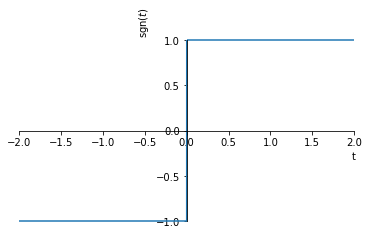

In [14]:
sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');

### Gauss

Una señal Gaussiana o Gauss, se define como:

$$
\text{Gauss}(t) = e^{-\pi t^2}
$$


In [15]:
gauss = sym.exp(-pi*t**2)
gauss

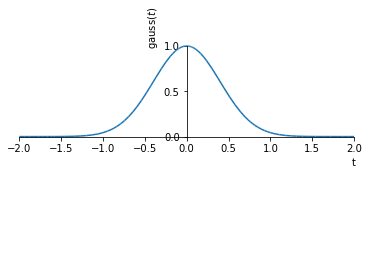

In [16]:
sym.plot(gauss, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'gauss$(t)$');

### Sinc

La [función Sinc](https://en.wikipedia.org/wiki/Sinc_function) se define como:

$$
\text{Sinc}(t) = \frac{\sin(\pi t)}{\pi t}
$$

Esta señal es muy importante, ya que juega un rol fundamental en el filtrado en frecuencia de señales y en la reconstrucción de señales discretas a análogas.

Existe otra versión muy utilizada del sinc que denotaremos como

$$
S_a(t) = \frac{\sin(t)}{t}
$$

El módulo simpy de Python utiliza esta última versión por defecto:


In [17]:
sinc = sym.sinc(t)
sinc

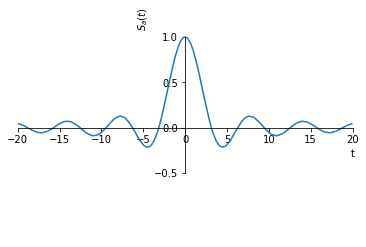

In [18]:
sym.plot(sinc, (t, -20, 20), ylim=[-1.2, 1.2], ylabel=r'$S_a(t)$');

<a name="dirichlet"></a>
***
### asinc o función de Dirichlet

La función asinc, o sinc aliado, se utiliza mucho en el filtrado de señales discretas. 
Se define como:
    
$$ \text{asinc}_M(t) = \frac{\sin(M \pi t)}{M \sin \pi t} $$

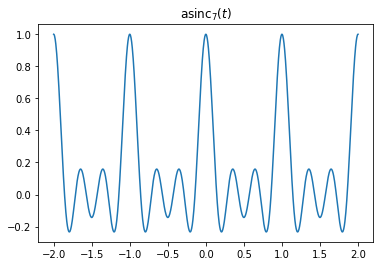

In [3]:
%matplotlib inline 

from IPython.display import Image
import matplotlib.pyplot as plt

def asinc(t,M): 
    return (np.sin(np.pi*t*M))/(M*np.sin(np.pi*t))

t = np.linspace(-2,2, 1000)

plt.plot(t, asinc(t,7))
plt.title('asinc$_7(t)$')
plt.show()    


<a name="impulso"></a>
***
### Impulso de Dirac

El [impulso de Dirac](./07-Impulso.ipynb) es una de las señales más importantes de la teoría de las señales y sistemas. Se utiliza para la caracterización de sistemas LTI y el modelado de señales de forma impulsiva. El impulso de Dirac se define por medio de la [función delta de Dirac](https://en.wikipedia.org/wiki/Dirac_delta_function) que *no es una función en el sentido convencional*. Es una función o distribución generalizada. El impulso de Dirac se denota como $ \delta$. El impulso de Dirac se define por su efecto sobre otras funciones, en el sentido de las distribuciones.

Formalmente, $\delta_a$ es una distribución que, al ser aplicada a una función de test suave o de Schwartz, denotada por $\varphi$, retorna el valor de la función de test evaluada en $a$, con $a \in \mathbb{R}$:

$$\langle \delta_a,\varphi \rangle = \varphi(a)$$

En el caso especial en que $a=0$, se tiene:


$$\langle \delta_0,\varphi \rangle = \langle \delta,\varphi \rangle = \varphi(0)$$

En sympy, Python utiliza la siguiente notación:

In [6]:
delta = sym.DiracDelta(t)
delta

Gráficamente, el impulso se representa de la siguiente manera:

<img src="images/dirac_delta.png" width="300">

la flecha pretender representar una amplitud infinita.

Una forma de entender la distribución $\delta$ es como el límite de una familia de funciones suaves que cada vez tienen mayor amplitud y un menor ancho, tal como lo muestra la figura:

<img src="images/delta_approximation.gif">

En este ejemplo, se aproxima la función delta como:

$$ \delta = \lim_{a \rightarrow 0} \frac{1}{|a|\sqrt{\pi}}e^{-(\frac{t}{a})^2}  $$

En este punto, no podemos decir mucho más acerca de la distribución $\delta$ hasta no ver un poco más de teoría de distribuciones.

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>